In [1]:
"""
Created in May  2019

@author: jaltes98
@author: jorgedelpozolerida

"""

'\nCreated in May  2019\n\n@author: jaltes98\n@author: jorgedelpozolerida\n\n'

## Import modules

## Function that runs the chromosome (genotype) to obtain its solution (phenotype)

In [0]:
import numpy as np
import random as rd
from numpy.random import choice

In [0]:
def run(chromosome,maze,initial_position,final_position): #input chromosome and maze to solve 
    
    position=initial_position.copy()
    
    for i in range(int(len(chromosome)/2)): #for each gene updates the position if the spot is empty 
        if (chromosome[(2*i):(2*i+2)])=='00':
            if (maze[position[0]][position[1]-1])!=1:
                position[1]+=-1
        elif (chromosome[(2*i):(2*i+2)])=='10':
            if (maze[position[0]-1][position[1]])!=1:
                position[0]+=-1
        elif (chromosome[(2*i):(2*i+2)])=='01':
            if (maze[position[0]+1][position[1]])!=1:
                position[0]+=1
        elif (chromosome[(2*i):(2*i+2)])=='11':
            if (maze[position[0]][position[1]+1])!=1:
                position[1]+=1
                
        if position==final_position: #in case it solves the maze output True, number of steps and the chromosome (not needed but helpful)
            return True,i,chromosome 
        
    else:
            return False,position,chromosome #if it does not solve it instead of number of steps return final position

## Functions to create a random chromosome and a population

In [0]:
def random_chromosome(length_elements):   #input length of the chromosome (twice the number of maximum steps)
    
    if length_elements % 2 ==0:  #make sure length is even
        chrom=''
        for i in range(length_elements): #update the chain with random binary until desired length
            chrom=chrom+str(rd.randint(0,1)) 
            
        return chrom #output chromosome
    
    else:
        print ('Please enter multiple of 2 as length of strands')

In [0]:
def initial_population(numb_elements,length_elements): #input number of chromosomes and its length
    
    population=[]
    for i in range(numb_elements): #update population until desired number
        population.append(random_chromosome(length_elements))
        
    return population #output pupolation

## Function that evaluates the population, does a ranking, and creates next generation through elitism, crossover and mutation

In [0]:
def natural_selection(population,maze,initial_position,final_position,elitism_percentage,mutation_percentage): #input population, maze to solve, initial position and goal, desired percentage of elitism and mutation rate

    numb_elements=len(population)
    length_elements=len(population[0]) 
    
    resultsTrue=[] #lists for chromosomes and its performance 
    fitnessTrue=[] 
    resultsFalse=[]
    fitnessFalse=[]
    
    for i in range(numb_elements): #run each chromosome and separate its result considering whether or not they rach the goal
        row_results=run(population[i],maze,initial_position,final_position) 
        if row_results[0]==True:
            fitnessTrue.append(row_results[1]) #number of steps
            resultsTrue.append(row_results[2]) 
        elif row_results[0]==False:
            fitnessFalse.append(np.linalg.norm(np.asarray(row_results[1])-np.asarray(final_position))) #distance to goal
            resultsFalse.append(row_results[2])
            
    sortedTrue=sorted(fitnessTrue)  #sort the performance lists
    sortedFalse=sorted(fitnessFalse)
    
    results=[]
    
    while len(resultsTrue)>0: #sort the chromosomes, first those that reach the goal and then the others
        for i in range(len(fitnessTrue)):
            if fitnessTrue[i]==sortedTrue[0]:
                results.append(resultsTrue[i])
                resultsTrue.pop(i)
                fitnessTrue.pop(i)
                sortedTrue.pop(0)
                break
    while len(resultsFalse)>0:
        for i in range(len(fitnessFalse)):
            if fitnessFalse[i]==sortedFalse[0]:
                results.append(resultsFalse[i])
                resultsFalse.pop(i)
                fitnessFalse.pop(i)
                sortedFalse.pop(0)
                break
   
    parents=[]
    n=round(elitism_percentage*numb_elements/100) #number of elite chromosomes
    for i in range(n): #best performing chromosomes go to next population
        parents.append(results[i])
 
    m=mutation_percentage/100 #mutation rate
    children=parents.copy()
    
    while len(children)<numb_elements: #update the list until next generation has the same number of individuals
        
        point1=rd.randint(0,length_elements/2) #two point crossover
        point2=rd.randint(length_elements/2,length_elements)
        parent1,parent2=rd.sample(parents,2)
        child1= parent1[:point1] +parent2[point1:point2] +parent1[point2:]
        child2= parent2[:point1] +parent1[point1:point2] +parent2[point2:]

        nchild1=''
        nchild2=''
        while len(nchild1)<length_elements: #randomly mutate the children
            if choice([True, False],p=[1-m,m])==True:
                nchild1=nchild1+child1[len(nchild1)]
            else:
                nchild1=nchild1+str(rd.randint(0,1))
            if choice([True, False],p=[1-m,m])==True:
                nchild2=nchild2+child2[len(nchild2)]
            else:
                nchild2=nchild2+str(rd.randint(0,1))
       
        children.append(nchild1)
        children.append(nchild2)

    return children #output the next generation

## Function that creates a an initial population and evolves it a certain number of generations

In [0]:
def main(numb_elements,length_elements,maze,initial_position,final_position,elitism_percentage,mutation_percentage,numb_generations): #input all variables
    
    chroms=[]
    gens=[]
    
    population=initial_population(numb_elements,length_elements) #create initial population
    
    for i in range(numb_generations): #iterate a certain number of generations 
        population=natural_selection(population,maze,initial_position,final_position,elitism_percentage,mutation_percentage)
        
        if i%5==0: #save the best performing chromosome each 5 iterations and print it (for visualization purposes)
            finish,final,chrom=run(population[0],maze,initial_position,final_position)
            chroms.append(chrom)
            gens.append(i)
            if finish==True:
                print('Generation ',i,'. Reaches the goal after ',final,' steps. Chromosome: ', chrom)
            elif finish==False:
                print('Generation ',i,'. Does not reach the goal, final position: ',final,' . Chromosome: ', chrom)
    
    return chroms,gens #output best chromosome each 5 iterations and generation number

## Try the code!!

In [0]:
numb_elements=100
length_elements=50

maze=[[1,1,1,1,1,1,1,1,1,1,1,1], #maze such that 1 are walls
      [1,0,0,0,0,0,0,0,0,0,0,1],
      [1,0,0,0,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,1,1,1,1,0,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,0,1,1,1,1,0,1],
      [1,0,0,1,0,0,1,0,0,0,0,1],
      [1,0,0,1,0,0,1,0,0,0,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,1,1,1,1,1,1,1,1,1,1,1]]

final_position=[9,9]
initial_position=[3,1]

elitism_percentage=15
mutation_percentage=10
numb_generations=51


chroms,gens=main(numb_elements,length_elements,maze,initial_position,final_position,elitism_percentage,mutation_percentage,numb_generations)

Generation  0 . Does not reach the goal, final position:  [7, 4]  . Chromosome:  01100111101000111011010010110111001101011101000101
Generation  5 . Reaches the goal after  23  steps. Chromosome:  10110011111111011011011111110101111101110101000100
Generation  10 . Reaches the goal after  21  steps. Chromosome:  10110011111111110111111111010101011101110001000110
Generation  15 . Reaches the goal after  19  steps. Chromosome:  11111011111111110111110111010101011100010100011011
Generation  20 . Reaches the goal after  19  steps. Chromosome:  11111011111111110111110111010101011100010100011011
Generation  25 . Reaches the goal after  18  steps. Chromosome:  11111011111111110111110111010101010100010100001011
Generation  30 . Reaches the goal after  18  steps. Chromosome:  11111011111111110111110111010101010100010100001011
Generation  35 . Reaches the goal after  17  steps. Chromosome:  10111111111111110111010111010101010000010011100110
Generation  40 . Reaches the goal after  17  steps. Chrom

*Note*: if a more complex maze is used the algorithm might not find the solution (e.g try `initial_position= [9,1]` ). To solve this a better fitness function should be used, for example try to minimize useless moves (go back and forth or hit the wall) to boost exploration.

## Make some nice plots

*Note*: this function was just for showing results and code might not be too smooth

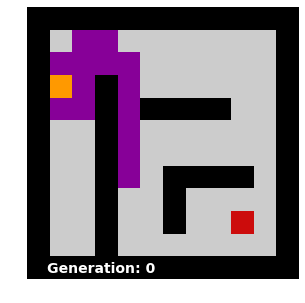

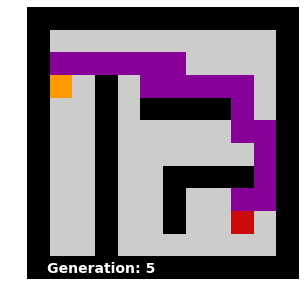

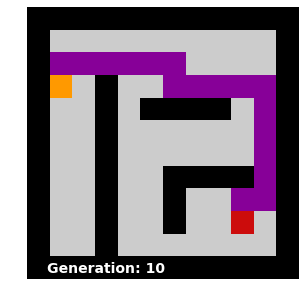

In [0]:
import numpy as np
import matplotlib.pyplot as plt

for chromosome,n in zip(chroms,gens):
    
    position=[3,1]
    
    maze=[[1,1,1,1,1,1,1,1,1,1,1,1],
      [1,0,0,0,0,0,0,0,0,0,0,1],
      [1,0,0,0,0,0,0,0,0,0,0,1],
      [1,16,0,1,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,1,1,1,1,0,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,0,0,1,0,0,1,1,1,1,0,1],
      [1,0,0,1,0,0,1,0,0,0,0,1],
      [1,0,0,1,0,0,1,0,0,19,0,1],
      [1,0,0,1,0,0,0,0,0,0,0,1],
      [1,1,1,1,1,1,1,1,1,1,1,1]]
    
    for i in range(int(len(chromosome)/2)):
        if (chromosome[(2*i):(2*i+2)])=='00':
            if (maze[position[0]][position[1]-1])==0:
                maze[position[0]][position[1]-1]=2
            if (maze[position[0]][position[1]-1])!=1:
                position[1]=position[1]-1
        elif (chromosome[(2*i):(2*i+2)])=='10':
            if (maze[position[0]-1][position[1]])==0:
                maze[position[0]-1][position[1]]=2
            if (maze[position[0]-1][position[1]])!=1:
                position[0]=position[0]-1
        elif (chromosome[(2*i):(2*i+2)])=='01':
            if (maze[position[0]+1][position[1]])==0:
                maze[position[0]+1][position[1]]=2
            if (maze[position[0]+1][position[1]])!=1:
                position[0]=position[0]+1
        elif (chromosome[(2*i):(2*i+2)])=='11':
            if (maze[position[0]][position[1]+1])==0:
                maze[position[0]][position[1]+1]=2
            if (maze[position[0]][position[1]+1])!=1:
                position[1]=position[1]+1
                
        if position==[9,9]:
            break
        

    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j]==0:
                maze[i][j]=20
            elif maze[i][j]==1:
                maze[i][j]=0
            elif maze[i][j]==2:
                maze[i][j]=2

    font = {
            'color':  'white',
            'weight': 'bold',
            'size': 14,
            }

    gen='Generation: '+str(n)
    
    plt.figure(figsize=(5,5))
    img=plt.imshow(maze);
    plt.text(0.4,11.25,gen,fontdict=font)
    img.set_cmap('nipy_spectral')
    plt.axis('off')
    plt.savefig('gen'+str(n)+'.png')
    plt.show()